#Numpy - uzupełnienie

In [18]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([[1,4],[5,6]])


In [19]:
a @ b

array([[11, 16],
       [23, 36]])

In [20]:
c = np.array([[1,2],[3,4],[5,6]])
d = np.array([[6,1],[3,0],[1,4]])

In [11]:

h = c @ d.T
g = d@c.T
print(g)
print(h)

[[ 8 22 36]
 [ 3  9 15]
 [ 9 19 29]]
[[ 8  3  9]
 [22  9 19]
 [36 15 29]]


In [12]:
e = np.array([1,2,3])
f = np.array([1,1,1])

In [13]:
e@f

6

In [14]:
np.linalg.det(h) #wyznacznik
np.linalg.inv(h) #odwracanie
np.linalg.eig(h) #wektory własne


(array([ 4.82784493e+01, -2.27844932e+00, -1.76560489e-15]),
 array([[ 0.22279442,  0.66488933,  0.45950375],
        [ 0.52280779, -0.04047749, -0.88071552],
        [ 0.82282116, -0.74584432, -0.11487594]]))

In [15]:
from numpy.random import default_rng

rng = default_rng()

rm1 = rng.standard_normal([3,3]) #rozkład normalny

In [16]:
rm1

array([[-0.42656865, -0.74214609, -0.48822798],
       [ 0.49818732, -0.31608325, -0.54204358],
       [ 0.18040749, -2.69255335, -0.50461678]])

In [17]:
rm2 = rng.uniform(-1,1,[3,3]) #rozkład jednorodny
rm2

array([[-0.26486812,  0.74588473, -0.76254778],
       [ 0.57400664, -0.30936579,  0.84850239],
       [ 0.78876753,  0.7570774 , -0.91396773]])

#Scatter ploty 2d

In [21]:
gauss_sample = rng.standard_normal([10000,2])

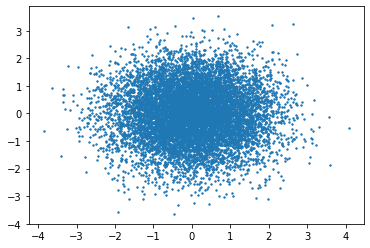

In [22]:
from matplotlib import pyplot as plt

plt.scatter(gauss_sample[:,0], gauss_sample[:,1], s=2)

#Wykres konturowy - 2d

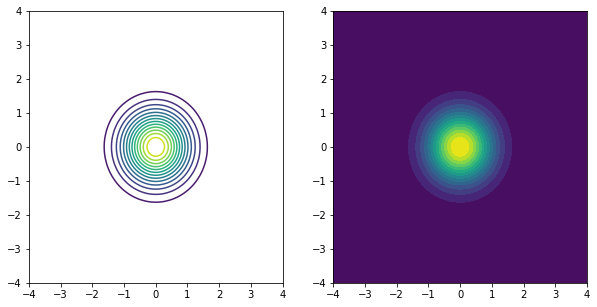

In [23]:
X,Y = np.meshgrid(np.linspace(-4,4, 100),np.linspace(-4,4, 100))

Z = np.exp(-(X)**2-(Y)**2)

fig,ax = plt.subplots(1,2)

levels = np.linspace(Z.min(), Z.max(), 15)

ax[0].contour(X,Y,Z, levels = levels)
ax[1].contourf(X,Y,Z, levels = levels)

fig.set_size_inches(10,5)

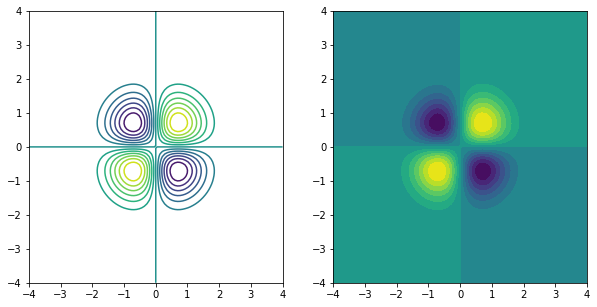

In [30]:
fig,ax = plt.subplots(1,2)
Z1=X*Y*np.exp(-(X)**2-(Y)**2)

levels = np.linspace(Z1.min(), Z1.max(), 15)

ax[0].contour(X,Y,Z1, levels = levels)
ax[1].contourf(X,Y,Z1, levels = levels)

fig.set_size_inches(10,5)


Text(0.5, 0, 'z')

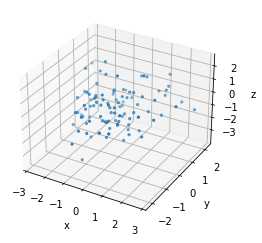

In [35]:
d3 = rng.normal(loc=[0,0,0], scale=[1,1,1], size=[100,3])
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(d3[:,0], d3[:,1], d3[:,2], marker = ".")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


#Ćwiczenie 1

In [38]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/UM/pipi-5GeV.dat", sep="\s+", 
                 header=0)
df

,mpipi,t,costh,phi
0,1.380,-0.797,-0.591,5.146
1,2.191,-1.313,-0.389,4.894
2,0.425,-3.877,0.745,2.051
3,0.723,-1.740,0.212,0.584
4,0.813,-3.069,0.102,5.162
...,...,...,...,...
999995,0.870,-6.858,0.931,3.074
999996,0.765,-5.666,-0.539,2.398
999997,1.460,-1.553,-0.492,1.034
999998,1.010,-3.845,-0.342,4.014


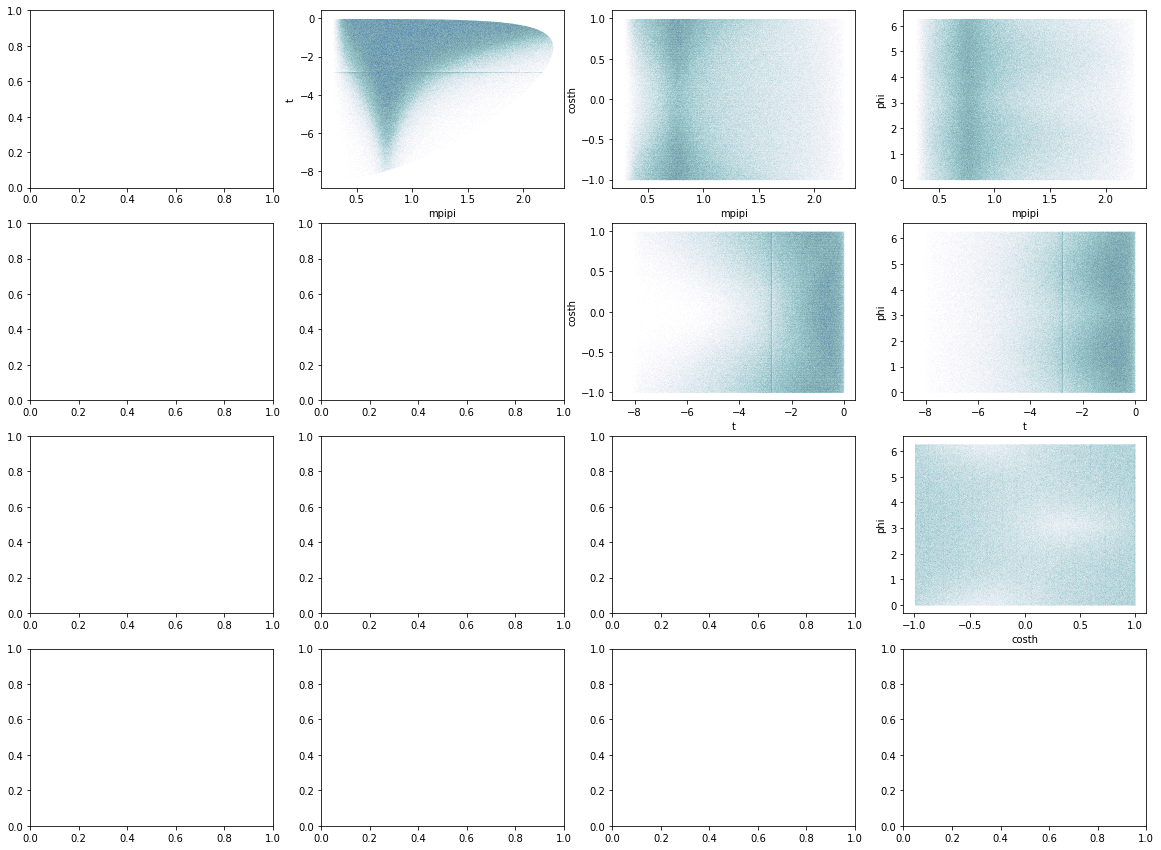

In [44]:
fig,ax = plt.subplots(4,4)

for i,col1 in enumerate(df.columns):
  for j,col2 in enumerate(df.columns):
    if j>i:
      ax[i][j].scatter(df[col1], df[col2], s=0.00001)
      ax[i][j].set_xlabel(df.columns[i])
      ax[i][j].set_ylabel(df.columns[j])

fig.set_size_inches(20,15)


#Część druga zajęć

Podstawowe modele statystyczne dla klasyfikacji: KNN, SVM, MLP, Lasy losowe

In [62]:
import numpy as np
#generowanie wielomianów parzystych i nieparzystych (n - potegi trójmianu)
def even(x, n1, n2, n3):
  return x**(2*n1)*(-1)**n1+x**(2*n2)*(-1)**n2+x**(2*n3)*(-1)**n3

def odd(x, n1, n2, n3):
  return x**(2*n1+1)*(-1)**n1+x**(2*n2+1)*(-1)**n2+x**(2*n3+1)*(-1)**n3

x = np.linspace(-1,1,50)


def generate(fun, x, count):
  l=len(x)
  tab = np.zeros([count, l])
  rng = np.random.default_rng()

  for i in range(count):
    n1, n2, n3 = rng.choice(10, 3)
    tab[i,:] = fun(x,n1,n2,n3)
  return tab

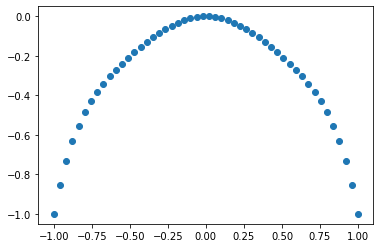

In [55]:
from matplotlib import pyplot as plt

plt.scatter(x,even(x,1,2,3))

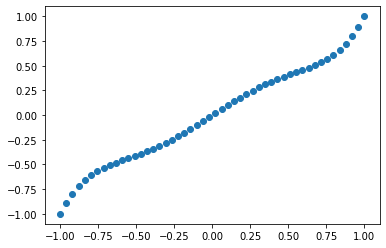

In [56]:
plt.scatter(x,odd(x,0,1,2))

In [63]:
x = np.linspace(-1,1,50)
odds = generate(odd, x, 500)
 
evens = generate(even, x, 500)

In [69]:
X=np.concatenate([evens,odds]) #zbiór uczący

In [68]:
Y=np.concatenate([np.zeros(500), np.ones(500)]) #etykiety

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [74]:
Y_train

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [75]:
from sklearn.neighbors import KNeighborsClassifier #knn - metoda k najbliższych sąsiadów

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [76]:
Y_pred_knn = knn.predict(X_test)

In [78]:
Y_pred_knn == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [79]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred_svc = svc.predict(X_test)

Y_pred_svc == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [82]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, Y_train)

Y_pred_svc = svc.predict(X_test)

Y_pred_svc == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [83]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, Y_train)

Y_pred_svc = svc.predict(X_test)

Y_pred_svc == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [87]:
cmknn = confusion_matrix(Y_test, Y_pred_knn, labels=[0,1])
cmknn

array([[120,   0],
       [  0, 130]])

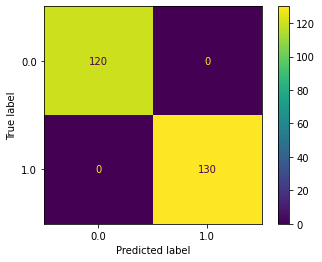

In [90]:
cdknn = ConfusionMatrixDisplay(cmknn, display_labels=knn.classes_)

cdknn.plot()

#Ćwiczenie

In [91]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target,test_size=0.25)

In [122]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_pred_knn == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

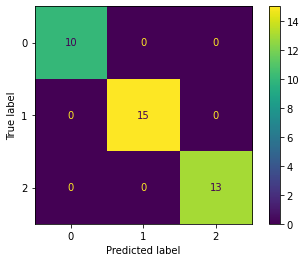

In [123]:
cmknn = confusion_matrix(Y_test, Y_pred_knn, labels=[0,1,2])
cmknn
cdknn = ConfusionMatrixDisplay(cmknn, display_labels=[0,1,2])

cdknn.plot()

In [124]:
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
Y_pred_svc == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

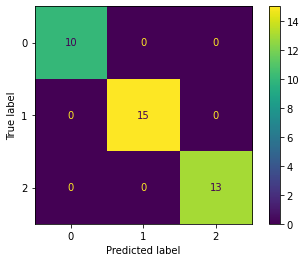

In [125]:
cmsvc = confusion_matrix(Y_test, Y_pred_svc, labels=[0,1,2])
cmsvc
cdsvc = ConfusionMatrixDisplay(cmsvc, display_labels=[0,1,2])

cdsvc.plot()

In [126]:
mlp.fit(X_train, Y_train)
Y_pred_mlp = mlp.predict(X_test)
Y_pred_mlp == Y_test

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

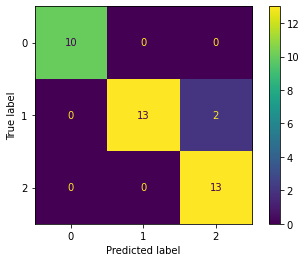

In [127]:
cmmlp = confusion_matrix(Y_test, Y_pred_mlp, labels=[0,1,2])
cmmlp
cdmlp = ConfusionMatrixDisplay(cmmlp, display_labels=[0,1,2])

cdmlp.plot()

In [128]:
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_pred_rfc == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

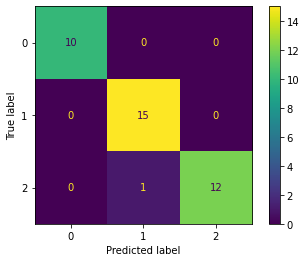

In [129]:
cmrfc = confusion_matrix(Y_test, Y_pred_rfc, labels=[0,1,2])
cmrfc
cdrfc = ConfusionMatrixDisplay(cmrfc, display_labels=[0,1,2])

cdrfc.plot()

In [130]:
#kolos:
#prezentacja danych w postaci graficznej
#podstawowe wersje pieciu modeli, z których korzystaliśmy